<hr>
Este material ha sido construido en conjunto con material suministrado por los profesores Pedro Atencio (Instituto Tecnológico Metropolitano), Carlos Mera (Universidad de Medellin), Albeiro Espinosa y Diego Patiño (Universidad Nacional de Colombia, Sede Medellín); a ellos les damos crédito.
<hr>

#  <center> VISIÓN ARTIFICIAL </center>
## Agenda del día


### Unidad 2 - Adquisición de imágenes
<ul>
  <li>La luz, el espectro electromagnético y la percepción visual</li>
  <li>**Formación y adquisición de imágenes digitales.**</li>
</ul>


# 2. Adquisición de imágenes
<hr>

## 2. Formacion y adquisicion de imagenes digitales

## Modelo Pin-Hole
<br>
<center><i>Figura. esquema de un modelo pinhole o camara estenopeica. <a href='https://es.wikipedia.org/wiki/Cámara_estenopeica'>wiki-pinhole.</a></i></center>
<img src="res/m1_2/pinhole.png" alt="modelo pinhole" style="height:300px">
<br>
<center><i>Figura. Una superficie mate emite luz en todas las direcciones. Cuando la apertura es muy  pequeña, desde cualquier punto sólo pasa luz con una dirección. Todos los puntos están bien definidos == imagen enfocada.. <a href='https://es.wikipedia.org/wiki/Cámara_estenopeica'>wiki-pinhole.</a></i></center>
<img src="res/m1_2/pinhole_2.png" alt="modelo pinhole" style="width:800px">
<br>
<center><i>Figura. Si la apertura no es lo suficientemente pequeña, se generan circulos de confusion en la imagen.</i></center>
<img src="res/m1_2/pinhole_3.png" alt="modelo pinhole" style="height:500px">
<br>
<center><i>Figura. El Modelo Pin-Hole tiene algunas limitaciones: si la apertura es muy pequeña, entonces entra poca luz y la imagen sale muy oscura</i></center>
<img src="res/m1_2/pinhole_4.png" alt="modelo pinhole" style="height:400px">
<br>
<ul>
<li><b>Solución 1:</b> aumentar el tiempo de exposición, manteniendo el tamaño de la apertura...lo cual no funciona bien si hay movimiento. Aunque, se puede usar para acumular movimiento.</li>
<li><b>Solución 2:</b> aumentar el tamaño de la apertura y utilizar unas lentes que realicen el enfoque.</li>
<li>Por las limitaciones físicas de las lentes, sólo se pueden enfocar los objetos en cierta distancia. <a href='http://www.redalyc.org/pdf/1492/149244222001.pdf'>Fusion de imagenes multifoco.</a></li>
<li>Profundidad de campo: rango de distancias (en la escena) en la que los objetos aparecen enfocados.</li>
</ul>
<hr>

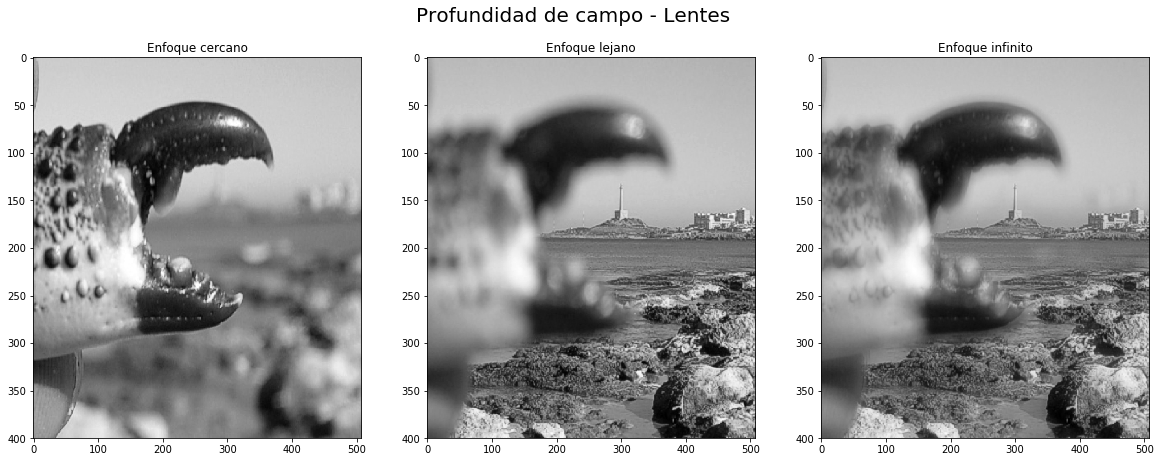

In [29]:
#Se importan las librerias para trabajar con imágenes
#Es muy importante colocar el comando %matplotlib inline
%matplotlib inline

from skimage import io
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np


#Se leen las imágenes con skimage
I1 = io.imread('res/m1_2/f_front.png')
#Guardar el tamaño de la imagen I1 en la variable tam
tam=np.shape(I1)
I2 = io.imread('res/m1_2/f_back.png')
#Redimensionar la imagen I2 para que quede del mismo tamaño que I1
#Este procedimiento se realiza ya que deben sumarse matrices más adelante
I2 = resize(I2, (tam[0],tam[1]))
#Realizar un subplot de 1x3 para mostrar las imágenes
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 7))
#Se toma la imagen I1 e I2 en el canal G (canal verde del espacio de color RGB)
I1= I1[:,:,1]
I2= I2[:,:,1]
#Mediante una transformación lineal se construye la tercera imagen (enfoque infinito)
I3= 0.001*I1+0.9*I2

#Se le da título a las figuras, a las imágenes y se muestran
fig.suptitle('Profundidad de campo - Lentes', fontsize=20)
ax1.set_title('Enfoque cercano')
ax1.imshow(I1, cmap='gray', aspect='auto')
ax2.set_title('Enfoque lejano')
ax2.imshow(I2, cmap='gray', aspect='auto')
ax3.set_title('Enfoque infinito')
ax3.imshow(I3, cmap='gray', aspect='auto')


## Sensores y dispositivos de captura
<br>
En la adquisición de imágenes se requiere de un sensor y digitalizador.
<ul>
<li>El Sensor es un dispositivo sensible a la energía radiada del objeto cuya imagen deseamos obtener.</li>
<li>El Digitalizador es un dispositivo que convierte la salida del sensor a una forma digital.</li>
<li>En una cámara digital el sensor produce una señal eléctrica proporcional a la intensidad de luz y el digitalizador convierte esta salida a formato digital.</li>
</ul>
<br>
<center><i>Figura. Esquema de un proceso de adquisicion de imagenes digitales.</i></center>
<img src="res/m1_2/sensor.png" alt="sensor digital" style="width:1000px">

<br>
Existen mucho tipos de sensores para la adquisición de imágenes, los cuales varía de acuerdo al tipo de onda electromagnética que se captura para producir la imagen
<ul>
<li>Los más populares son los basados en CCD (Charge-Coupled Devices) y los CMOS (Complementary Metal Oxide Semiconductor).</li>
<li>El Digitalizador es un dispositivo que convierte la salida del sensor a una forma digital.</li>
<li>Estos sensores son un chip que integra una matriz o línea de fotodetectores.</li>
</ul>
<br>
<center><i>Figura. Esquema de un sensor adquisicion de imagenes digitales.</i></center>
<img src="res/m1_2/sensor_2.png" alt="sensor digital" style="width:800px">
<hr>

## La imagen digital
<br>
La transformación de una imagen analógica a una imagen digital, que es discreta, se llama digitalización y es el primer paso en cualquier aplicación de procesamiento de imágenes digitales.
<br>
<center><i>Figura. Esquema de la transformacion de una imagen analogica (escena fisica) a una imagen digital.</i></center>
<img src="res/m1_2/imagen_digital_1.png" alt="imagen digital" style="width:900px">
<br>
<center><i>Figura. Muestreo: La digitalización se realiza a través de un muestreo de las señales analógica.</i></center>
<img src="res/m1_2/imagen_digital_2.png" alt="imagen digital" style="width:600px">
<br>
<center><i>Figura. cuantizacion.</i></center>
<img src="res/m1_2/imagen_digital_3.png" alt="imagen digital" style="width:600px">
<br>
<center><i>Figura. La cuantificación asigna valores representativos a cada muestra de la señal. Izquierda) Imagen continua proyectada sobre un arreglo de sensores (muestreo). Derecha) Resultado obtenido al muestrear y cuantizar la imagen.
</i></center>
<img src="res/m1_2/imagen_digital_4.png" alt="imagen digital" style="width:600px">
<br>
<center><i>Figura. La Representación de una Imagen Digital se hace a través de una matriz de valores que almacenan los valores de intensidad de luz en cada punto de la misma. De manera más formal, una imagen es una función bidimensional de la intensidad de la luz f(x,y), donde un punto de la función representa la intensidad de luz equivalente en la escena. Los valores de la función f(x,y) representan niveles de gris, opacidad, transparencia, distancia o densidad de órganos, calor, etc.
</i></center>
<img src="res/m1_2/imagen_digital_5.png" alt="imagen digital" style="height:400px">
<br>
<center><h2>$I_{MxN} = f(x,y); x=\left \{ 0,1,2,...,M-1\right\},y=\left \{0,1,2,...,N-1\right\}$</h2></center>
<br>
<center><i>Figura. Una imagen digital se puede tratar como una matriz bidimensional (escala de gris).
</i></center>
<img src="res/m1_2/imagen_digital_6.png" alt="imagen digital" style="height:370px">
<br>
<br>
<center><i>Figura. En el Muestreo se determina la Resolución Espacial, la cual está relacionada con el número de píxeles usados para representar la imagen. Entre más píxeles, mejor resolución espacial tendrá la imagen.
</i></center>
<img src="res/m1_2/imagen_digital_7.png" alt="imagen digital" style="height:370px">
<br>
<br>
<center><i>Figura. La Cuantización determina la Resolución en Amplitud de la imagen, la cual está relacionada con el número de bits con que se usan para almacenar el valor de cada píxel, es decir, en la cuantificación se determina el número de niveles de gris usados para la representación de la imagen.
</i></center>
<img src="res/m1_2/imagen_digital_8.png" alt="imagen digital" style="height:300px">
<br>
Las imágenes a color se representan usando tres canales: uno para el rojo, uno para el verde y otro para el azul(Canal RGB).
<br>
<center><i>Figura. Separacion de los canales R, G y B de una imagen digital a color.
</i></center>
<img src="res/m1_2/imagen_digital_9.png" alt="imagen digital" style="width:900px">
<br><br>
En el caso de color, nuestra matriz se torna 3-dimensional:
<center><h3>$I_{MxNxC} = f(x,y,c); x=\left \{ 0,1,2,...,M-1\right\},y=\left \{0,1,2,...,N-1\right\},c=\left\{0,1,2,...,C-1\right\}$</h3></center>
<br><br>
La representacion RGB es el estandar para visualizacion y tratamiento de imagenes. Sin embargo existen otros espacios de color que tienen su utilidad en distintas aplicaciones. No todos los espacios de color se pueden visualizar.
<center><i>Figura. Separacion de los canales R, G y B de una imagen digital a color.
</i></center>
<img src="res/m1_2/imagen_digital_10.png" alt="imagen digital" style="width:900px">
<br><br>
En las imágenes a color, la resolución espacial y en amplitud está determinada por la información de cada canal:
<center><i>Figura. Resolucion espacial y amplitud.
</i></center>
<img src="res/m1_2/imagen_digital_11.png" alt="imagen digital" style="height:300px">
<hr>

### Conclusiones
<ul>
<li>Las imágenes digitales son representaciones aproximadas de una escena optica (visual o no visual).</li>
<li>La cantidad y calidad de información capturada de una escena, depende del sensor y arreglo optico utilizado.</li>
<li>Las imágenes digitales, para su tratamiento, se representan como un arreglo n-dimensional.</li>
<li>El espacio de color mas conocido es el RGB, en el cual, cada canal: R,G y B, almacena informacion particular de un rango de longitudes de onda asociados a la percepcion humana de los colores rojo, verde y azul.</li>
</ul>